##### Module import

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from lifelines.statistics import logrank_test, multivariate_logrank_test
from lifelines import KaplanMeierFitter

In [2]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

##### Data import

In [3]:
print(os.getcwd())

c:\Users\Owner\Desktop\윤태준\고용패널\고용패널 파이썬 분석\2023_04_06_변수추가


In [4]:
df = pd.read_csv('2023_04_06_data_step.csv', encoding='cp949')
df.columns

Index(['pid', 'majorcat', 'province', 'area', 'sex', 'age', 'a003', 'a010',
       'a141', 'a144', 'a146', 'd016', 'd131', 'd134', 'd136', 'f073', 'f074',
       'h001', 'q001', 'q015', 'q016', 'q017', 'p001', 'First_Work', 'year',
       'Resign', 'a038', 'a039', 'a043', 'a045', 'g191a046', 'a048', 'a392',
       'a140', 'd130', 'Admission', 'Graduation', 'Cur', 'Cur_Work_date',
       'Start_Work1_date', 'End_Work1_date', 'Work_to_Cur', 'Start_to_End',
       'FirstWorkPeriod', 'LongWork', 'LongWork2', 'major_same', 'major_help',
       'big_company', 'work_sati', 'score', 'q001G', 'p001G', 'provinceG',
       'major_sameG', 'major_helpG', 'majorcatG', 'q015G', 'q016G', 'q017G',
       'big_companyG', 'work_satiG', '나이', '학점', '성별', '건강상태', '결혼상태', '대학지역',
       '전공일치', '본전공', '재학중일자리경험', '삶의만족도_개인', '삶의만족도_관계', '삶의만족도_소속집단', '종사자수',
       '업무만족도'],
      dtype='object')

In [5]:
df_1 = df[['pid', 'majorcat', 'province', 'area', 'sex', 'age', 'a003', 'a010',
       'a141', 'a144', 'a146', 'd016', 'd131', 'd134', 'd136', 'f073', 'f074',
       'h001', 'q001', 'q015', 'q016', 'q017', 'p001', 'First_Work', 'year',
       'Resign', 'Admission', 'Graduation', 'Cur', 'Cur_Work_date',
       'Start_Work1_date', 'End_Work1_date', 'Work_to_Cur', 'Start_to_End',
       'FirstWorkPeriod', 'LongWork', 'LongWork2', 'major_same', 'major_help',
       'big_company', 'work_sati', 'score', 'q001G', 'p001G', 'provinceG',
       'major_sameG', 'major_helpG', 'majorcatG', 'q015G', 'q016G', 'q017G',
       'big_companyG', 'work_satiG',
       '나이', '성별', '건강상태', '결혼상태', '대학지역',  '전공일치', '본전공', '학점',
       '재학중일자리경험', '삶의만족도_개인', '삶의만족도_관계', '삶의만족도_소속집단',
       '종사자수', '업무만족도']].copy()

##### Kaplan Meier Plot

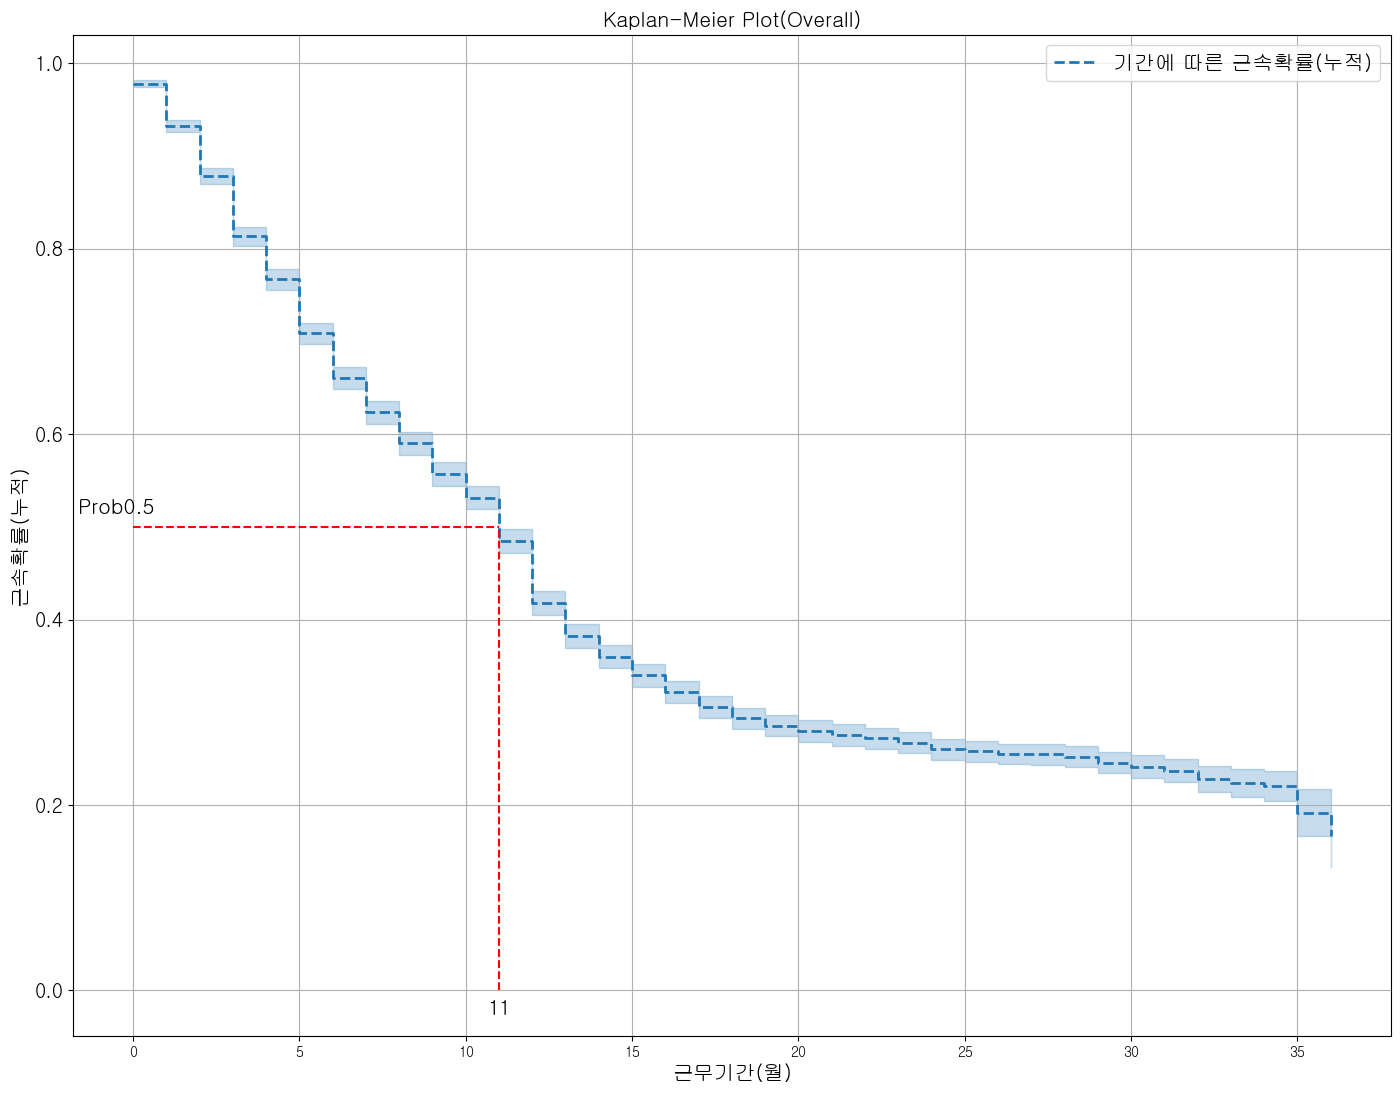

In [6]:
# Create a Kaplan-Meier plot
kmf = KaplanMeierFitter()
kmf.fit(df_1['FirstWorkPeriod'], event_observed=df_1['Resign'])

# Find the first point where the y-axis becomes 0.5
q = kmf.survival_function_.reset_index()
q = q[q['KM_estimate'] <= 0.5].iloc[0]['timeline']

plt.figure(figsize=(17,13))
kmf.plot(ci_show=True, linestyle='--', linewidth=2)
q = kmf.median_survival_time_
plt.plot([q, q], [0, 0.5], linestyle='--', color='r')
plt.plot([0, q], [0.5, 0.5], linestyle='--', color='r')
plt.text(q, -0.02, f"{q:.0f}", ha='center', va='center', fontsize=15)
plt.text(-0.5, 0.52, f"Prob{0.5}", ha='center', va='center', fontsize=15)

plt.grid(True)
plt.legend(['기간에 따른 근속확률(누적)'], fontsize=15)
plt.xlabel('근무기간(월)', fontsize=15)
# plt.xticks(range(0,1501,100))
plt.ylabel('근속확률(누적)', fontsize=15)
plt.yticks(fontsize=14)
plt.title('Kaplan-Meier Plot(Overall)', fontsize=15)

plt.show()

##### log rank test

##### 본전공 비교

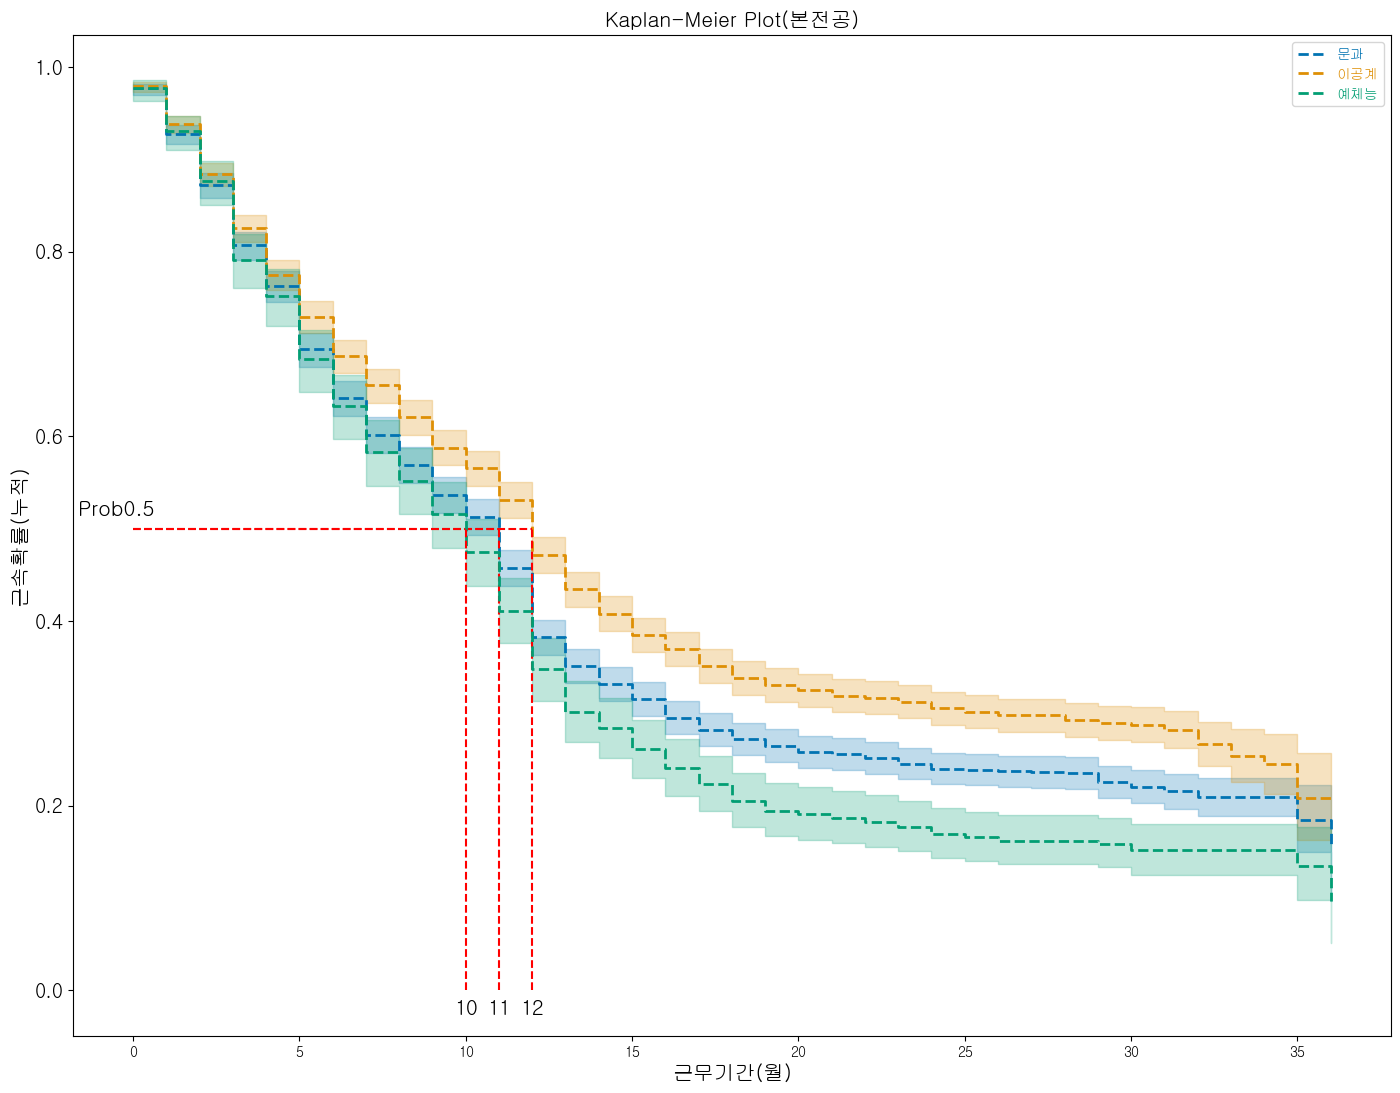

In [7]:
# define kmf3
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf3 = KaplanMeierFitter()

# divide data into two groups based on a condition (for example, 본전공)
group1 = df_1.loc[df_1['본전공'] == '문과']
group2 = df_1.loc[df_1['본전공'] == '이공계']
group3 = df_1.loc[df_1['본전공'] == '예체능']

#set seaborn palette
palette = sns.set_palette("colorblind")

plt.figure(figsize=(17,13))

# fit and plot KM curves for each group
kmf1.fit(group1['FirstWorkPeriod'], event_observed=group1['Resign'], label='문과')
q1 = kmf1.median_survival_time_
kmf1.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q1, q1], [0, 0.5], linestyle='--', color='r')
plt.plot([0, q1], [0.5, 0.5], linestyle='--', color='r')

kmf2.fit(group2['FirstWorkPeriod'], event_observed=group2['Resign'], label='이공계')
q2 = kmf2.median_survival_time_
kmf2.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q2, q2], [0, 0.5], linestyle='--', color='r')
plt.plot([0, q2], [0.5, 0.5], linestyle='--', color='r')

kmf3.fit(group3['FirstWorkPeriod'], event_observed=group3['Resign'], label='예체능')
q3 = kmf3.median_survival_time_
kmf3.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q3, q3], [0, 0.5], linestyle='--', color='r')

plt.title('Kaplan-Meier Plot(본전공)', fontsize=15)
plt.xlabel('근무기간(월)', fontsize= 15)
plt.ylabel('근속확률(누적)', fontsize=15)
plt.yticks(fontsize=14)

plt.text(q1, -0.02, f"{q1:.0f}", ha='center', va='center', fontsize=15)
plt.text(q2, -0.02, f"{q2:.0f}", ha='center', va='center', fontsize=15)
plt.text(q3, -0.02, f"{q3:.0f}", ha='center', va='center', fontsize=15)
plt.text(-0.5, 0.52, f"Prob{0.5}", ha='center', va='center', fontsize=15)

# set the legend using the palette
plt.legend(title='Group', fontsize=15, title_fontsize=15)
for i, text in enumerate(plt.legend().get_texts()):
    text.set_color(sns.color_palette()[i])

# # calculate log rank test statistics and add plot
# results_1 = logrank_test(group1['FirstWorkPeriod'], group2['FirstWorkPeriod'], group2['Resign'], group1['Resign'])
# plt.text(10,0.7,f"문과 vs 이공계_Log-Rank Test: p-value={results_1.p_value:.4f}", fontsize=15)

# results_2 = logrank_test(group1['FirstWorkPeriod'], group1['Resign'], group3['FirstWorkPeriod'], group3['Resign'])
# plt.text(10,0.5,f"문과 vs 예체능_Log-Rank Test: p-value={results_2.p_value:.4f}", fontsize=15)

# results_3 = logrank_test( group2['FirstWorkPeriod'], group2['Resign'], group3['FirstWorkPeriod'], group3['Resign'])
# plt.text(10,0.6,f"이공계 vs 예체능_Log-Rank Test: p-value={results_3.p_value:.4f}", fontsize=15)

plt.show()

##### 업무만족도

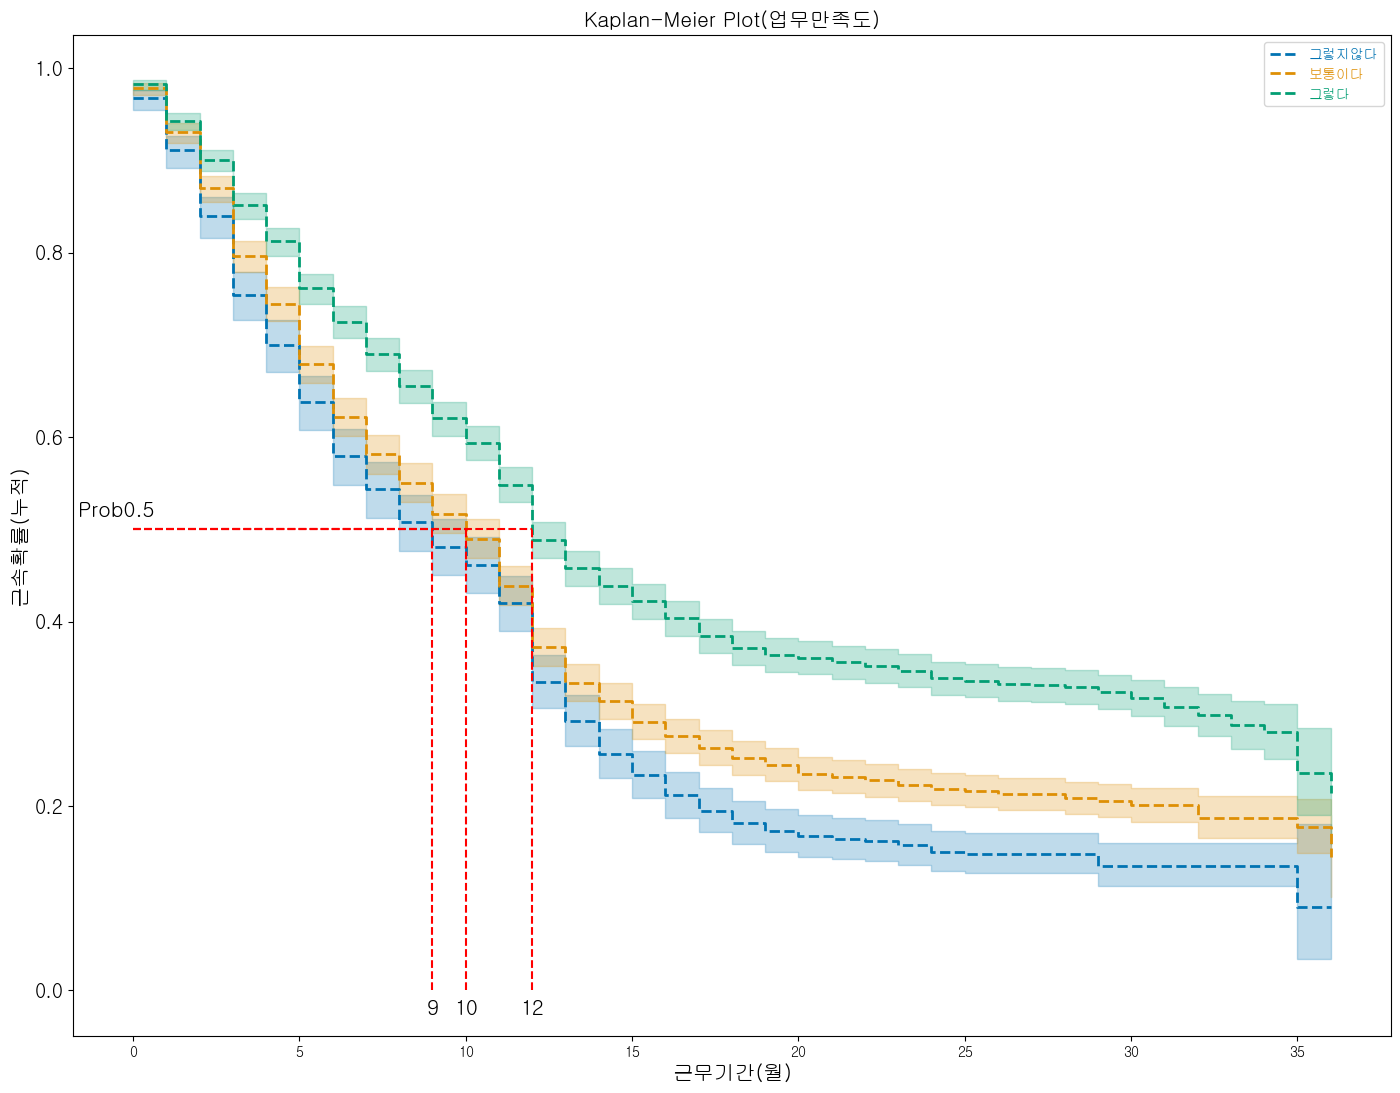

In [35]:
# define kmf3
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf3 = KaplanMeierFitter()

# divide data into two groups based on a condition (for example, 업무만족도)
group1 = df_1.loc[df_1['업무만족도'] == '그렇지않다']
group2 = df_1.loc[df_1['업무만족도'] == '보통이다']
group3 = df_1.loc[df_1['업무만족도'] == '그렇다']

#set seaborn palette
palette = sns.set_palette("colorblind")

plt.figure(figsize=(17,13))

# fit and plot KM curves for each group
kmf1.fit(group1['FirstWorkPeriod'], event_observed=group1['Resign'], label='그렇지않다')
q1 = kmf1.median_survival_time_
kmf1.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q1, q1], [0, 0.5], linestyle='--', color='r')
plt.plot([0, q1], [0.5, 0.5], linestyle='--', color='r')

kmf2.fit(group2['FirstWorkPeriod'], event_observed=group2['Resign'], label='보통이다')
q2 = kmf2.median_survival_time_
kmf2.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q2, q2], [0, 0.5], linestyle='--', color='r')
plt.plot([0, q2], [0.5, 0.5], linestyle='--', color='r')

kmf3.fit(group3['FirstWorkPeriod'], event_observed=group3['Resign'], label='그렇다')
q3 = kmf3.median_survival_time_
kmf3.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q3, q3], [0, 0.5], linestyle='--', color='r')
plt.plot([0, q3], [0.5, 0.5], linestyle='--', color='r')

plt.title('Kaplan-Meier Plot(업무만족도)', fontsize=15)
plt.xlabel('근무기간(월)', fontsize= 15)
plt.ylabel('근속확률(누적)', fontsize=15)
plt.yticks(fontsize=14)

plt.text(q1, -0.02, f"{q1:.0f}", ha='center', va='center', fontsize=15)
plt.text(q2, -0.02, f"{q2:.0f}", ha='center', va='center', fontsize=15)
plt.text(q3, -0.02, f"{q3:.0f}", ha='center', va='center', fontsize=15)
plt.text(-0.5, 0.52, f"Prob{0.5}", ha='center', va='center', fontsize=15)

# set the legend using the palette
plt.legend(title='Group', fontsize=15, title_fontsize=15)
for i, text in enumerate(plt.legend().get_texts()):
    text.set_color(sns.color_palette()[i])

# # calculate log rank test statistics and add plot
# results_1 = logrank_test(group1['FirstWorkPeriod'], group2['FirstWorkPeriod'], group2['Resign'], group1['Resign'])
# plt.text(10,0.7,f"그렇지않다 vs 이공계_Log-Rank Test: p-value={results_1.p_value:.4f}", fontsize=15)

# results_2 = logrank_test(group1['FirstWorkPeriod'], group1['Resign'], group3['FirstWorkPeriod'], group3['Resign'])
# plt.text(10,0.5,f"문과 vs 예체능_Log-Rank Test: p-value={results_2.p_value:.4f}", fontsize=15)

# results_3 = logrank_test( group2['FirstWorkPeriod'], group2['Resign'], group3['FirstWorkPeriod'], group3['Resign'])
# plt.text(10,0.6,f"보통이다 vs 예체능_Log-Rank Test: p-value={results_3.p_value:.4f}", fontsize=15)

plt.show()

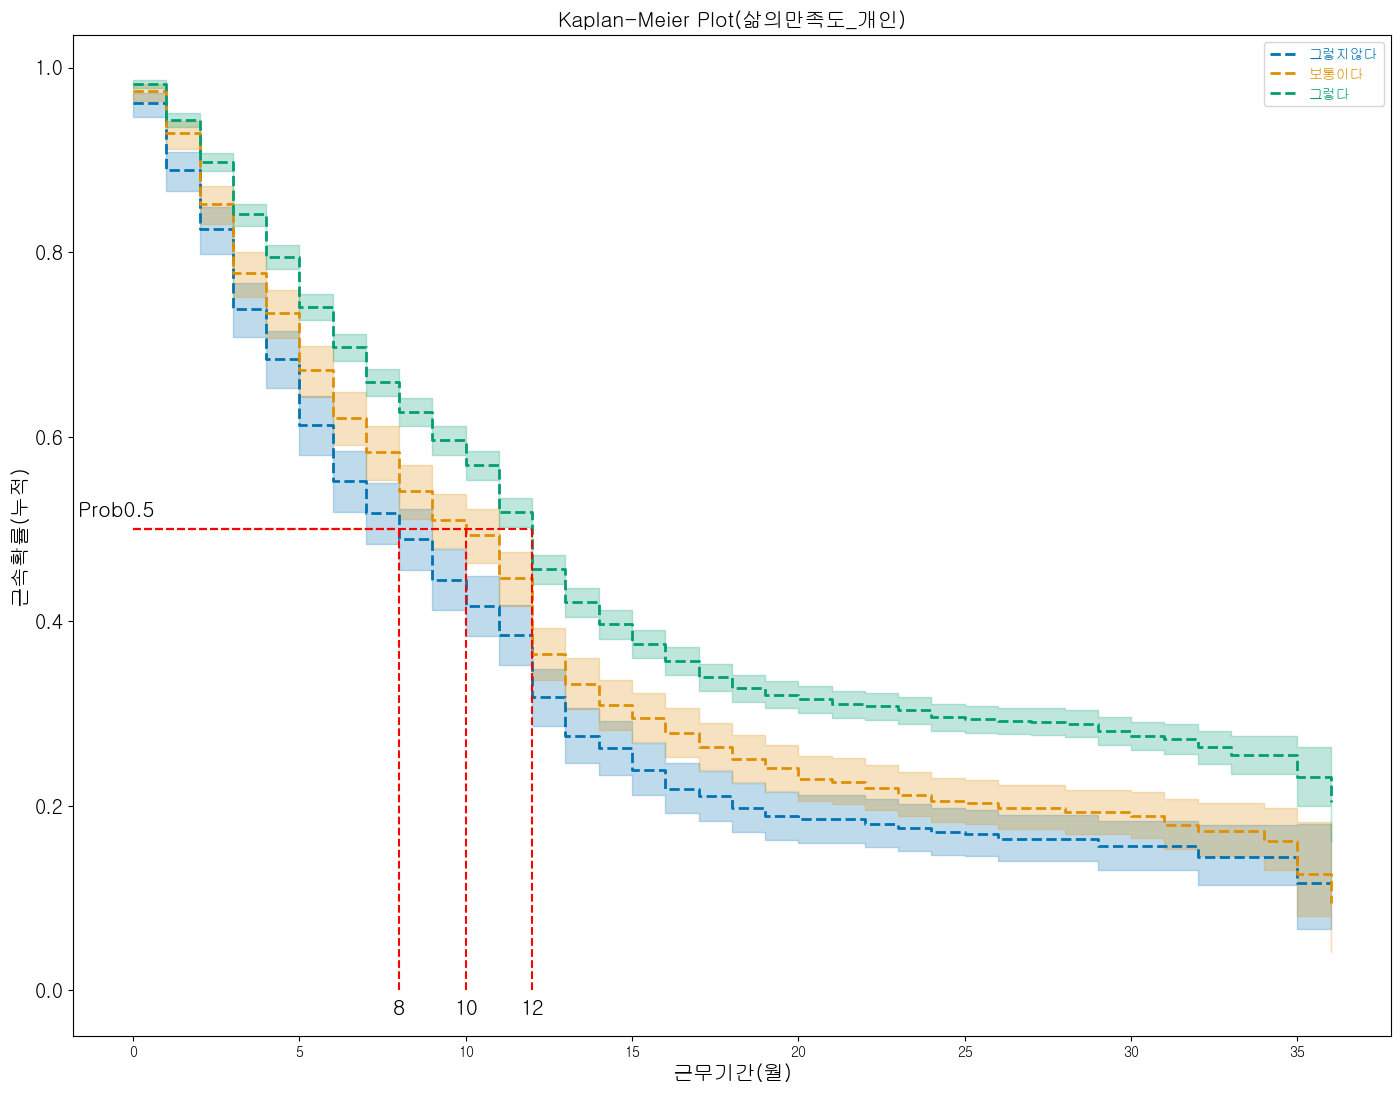

In [36]:
# define kmf3
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf3 = KaplanMeierFitter()

# divide data into two groups based on a condition (for example, 삶의만족도_개인)
group1 = df_1.loc[df_1['삶의만족도_개인'] == '그렇지않다']
group2 = df_1.loc[df_1['삶의만족도_개인'] == '보통이다']
group3 = df_1.loc[df_1['삶의만족도_개인'] == '그렇다']

#set seaborn palette
palette = sns.set_palette("colorblind")

plt.figure(figsize=(17,13))

# fit and plot KM curves for each group
kmf1.fit(group1['FirstWorkPeriod'], event_observed=group1['Resign'], label='그렇지않다')
q1 = kmf1.median_survival_time_
kmf1.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q1, q1], [0, 0.5], linestyle='--', color='r')
plt.plot([0, q1], [0.5, 0.5], linestyle='--', color='r')

kmf2.fit(group2['FirstWorkPeriod'], event_observed=group2['Resign'], label='보통이다')
q2 = kmf2.median_survival_time_
kmf2.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q2, q2], [0, 0.5], linestyle='--', color='r')
plt.plot([0, q2], [0.5, 0.5], linestyle='--', color='r')

kmf3.fit(group3['FirstWorkPeriod'], event_observed=group3['Resign'], label='그렇다')
q3 = kmf3.median_survival_time_
kmf3.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q3, q3], [0, 0.5], linestyle='--', color='r')
plt.plot([0, q3], [0.5, 0.5], linestyle='--', color='r')

plt.title('Kaplan-Meier Plot(삶의만족도_개인)', fontsize=15)
plt.xlabel('근무기간(월)', fontsize= 15)
plt.ylabel('근속확률(누적)', fontsize=15)
plt.yticks(fontsize=14)

plt.text(q1, -0.02, f"{q1:.0f}", ha='center', va='center', fontsize=15)
plt.text(q2, -0.02, f"{q2:.0f}", ha='center', va='center', fontsize=15)
plt.text(q3, -0.02, f"{q3:.0f}", ha='center', va='center', fontsize=15)
plt.text(-0.5, 0.52, f"Prob{0.5}", ha='center', va='center', fontsize=15)

# set the legend using the palette
plt.legend(title='Group', fontsize=15, title_fontsize=15)
for i, text in enumerate(plt.legend().get_texts()):
    text.set_color(sns.color_palette()[i])

# # calculate log rank test statistics and add plot
# results_1 = logrank_test(group1['FirstWorkPeriod'], group2['FirstWorkPeriod'], group2['Resign'], group1['Resign'])
# plt.text(10,0.7,f"그렇지않다 vs 이공계_Log-Rank Test: p-value={results_1.p_value:.4f}", fontsize=15)

# results_2 = logrank_test(group1['FirstWorkPeriod'], group1['Resign'], group3['FirstWorkPeriod'], group3['Resign'])
# plt.text(10,0.5,f"문과 vs 예체능_Log-Rank Test: p-value={results_2.p_value:.4f}", fontsize=15)

# results_3 = logrank_test( group2['FirstWorkPeriod'], group2['Resign'], group3['FirstWorkPeriod'], group3['Resign'])
# plt.text(10,0.6,f"보통이다 vs 예체능_Log-Rank Test: p-value={results_3.p_value:.4f}", fontsize=15)

plt.show()

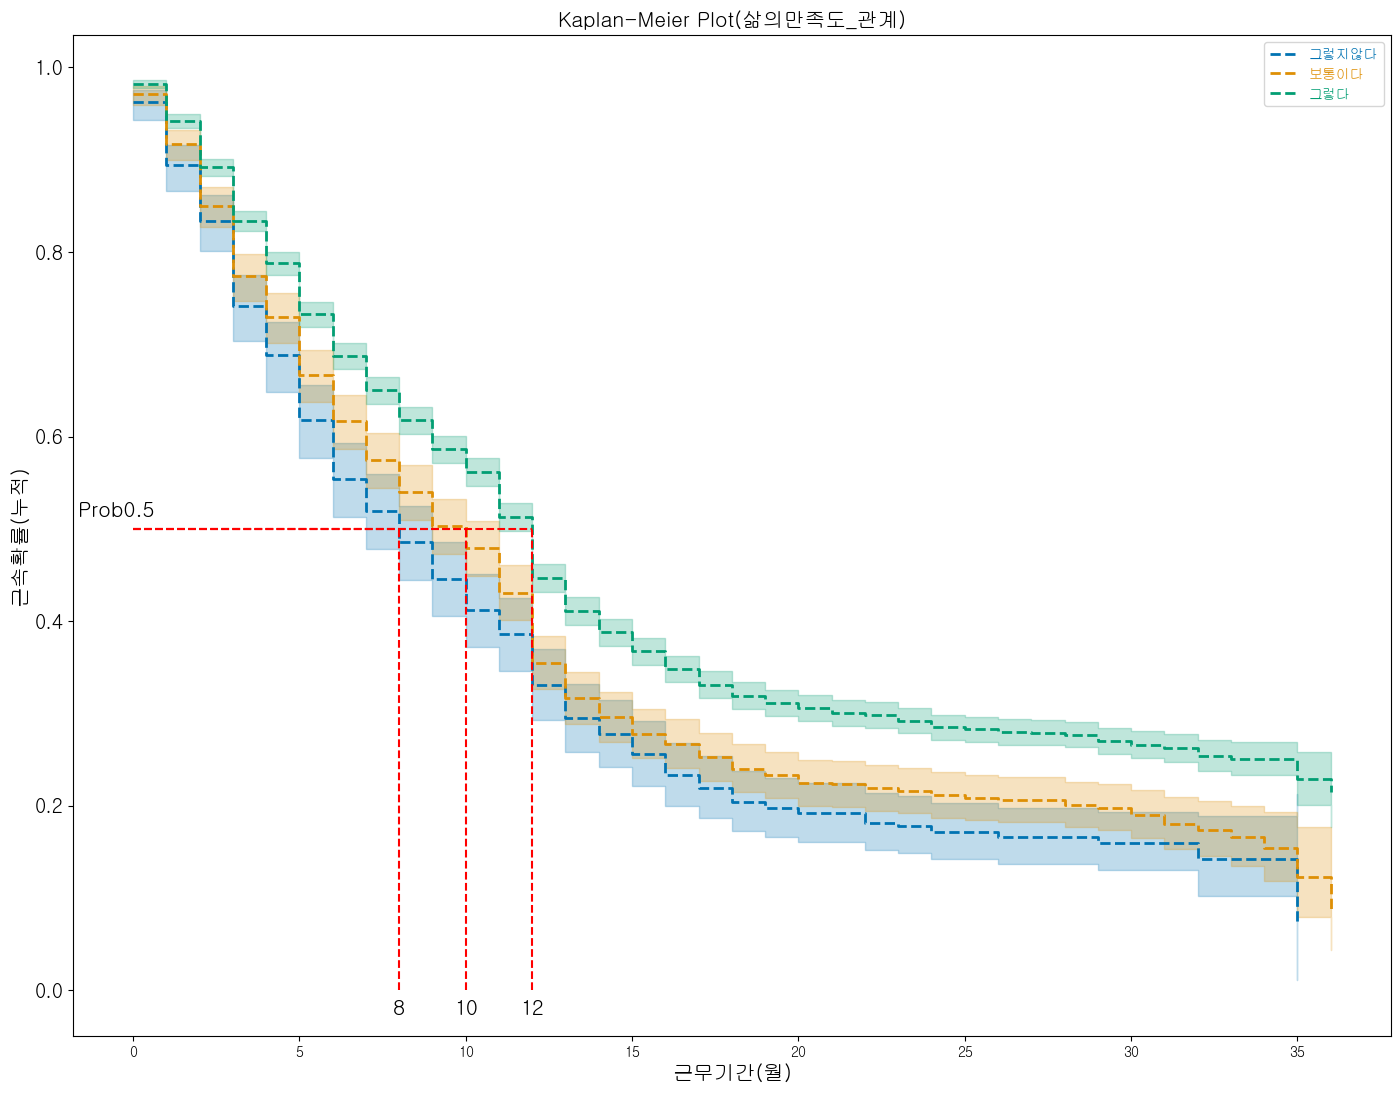

In [37]:
# define kmf3
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf3 = KaplanMeierFitter()

# divide data into two groups based on a condition (for example, 삶의만족도_관계)
group1 = df_1.loc[df_1['삶의만족도_관계'] == '그렇지않다']
group2 = df_1.loc[df_1['삶의만족도_관계'] == '보통이다']
group3 = df_1.loc[df_1['삶의만족도_관계'] == '그렇다']

#set seaborn palette
palette = sns.set_palette("colorblind")

plt.figure(figsize=(17,13))

# fit and plot KM curves for each group
kmf1.fit(group1['FirstWorkPeriod'], event_observed=group1['Resign'], label='그렇지않다')
q1 = kmf1.median_survival_time_
kmf1.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q1, q1], [0, 0.5], linestyle='--', color='r')
plt.plot([0, q1], [0.5, 0.5], linestyle='--', color='r')

kmf2.fit(group2['FirstWorkPeriod'], event_observed=group2['Resign'], label='보통이다')
q2 = kmf2.median_survival_time_
kmf2.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q2, q2], [0, 0.5], linestyle='--', color='r')
plt.plot([0, q2], [0.5, 0.5], linestyle='--', color='r')

kmf3.fit(group3['FirstWorkPeriod'], event_observed=group3['Resign'], label='그렇다')
q3 = kmf3.median_survival_time_
kmf3.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q3, q3], [0, 0.5], linestyle='--', color='r')
plt.plot([0, q3], [0.5, 0.5], linestyle='--', color='r')

plt.title('Kaplan-Meier Plot(삶의만족도_관계)', fontsize=15)
plt.xlabel('근무기간(월)', fontsize= 15)
plt.ylabel('근속확률(누적)', fontsize=15)
plt.yticks(fontsize=14)

plt.text(q1, -0.02, f"{q1:.0f}", ha='center', va='center', fontsize=15)
plt.text(q2, -0.02, f"{q2:.0f}", ha='center', va='center', fontsize=15)
plt.text(q3, -0.02, f"{q3:.0f}", ha='center', va='center', fontsize=15)
plt.text(-0.5, 0.52, f"Prob{0.5}", ha='center', va='center', fontsize=15)

# set the legend using the palette
plt.legend(title='Group', fontsize=15, title_fontsize=15)
for i, text in enumerate(plt.legend().get_texts()):
    text.set_color(sns.color_palette()[i])

# # calculate log rank test statistics and add plot
# results_1 = logrank_test(group1['FirstWorkPeriod'], group2['FirstWorkPeriod'], group2['Resign'], group1['Resign'])
# plt.text(10,0.7,f"그렇지않다 vs 이공계_Log-Rank Test: p-value={results_1.p_value:.4f}", fontsize=15)

# results_2 = logrank_test(group1['FirstWorkPeriod'], group1['Resign'], group3['FirstWorkPeriod'], group3['Resign'])
# plt.text(10,0.5,f"문과 vs 예체능_Log-Rank Test: p-value={results_2.p_value:.4f}", fontsize=15)

# results_3 = logrank_test( group2['FirstWorkPeriod'], group2['Resign'], group3['FirstWorkPeriod'], group3['Resign'])
# plt.text(10,0.6,f"보통이다 vs 예체능_Log-Rank Test: p-value={results_3.p_value:.4f}", fontsize=15)

plt.show()

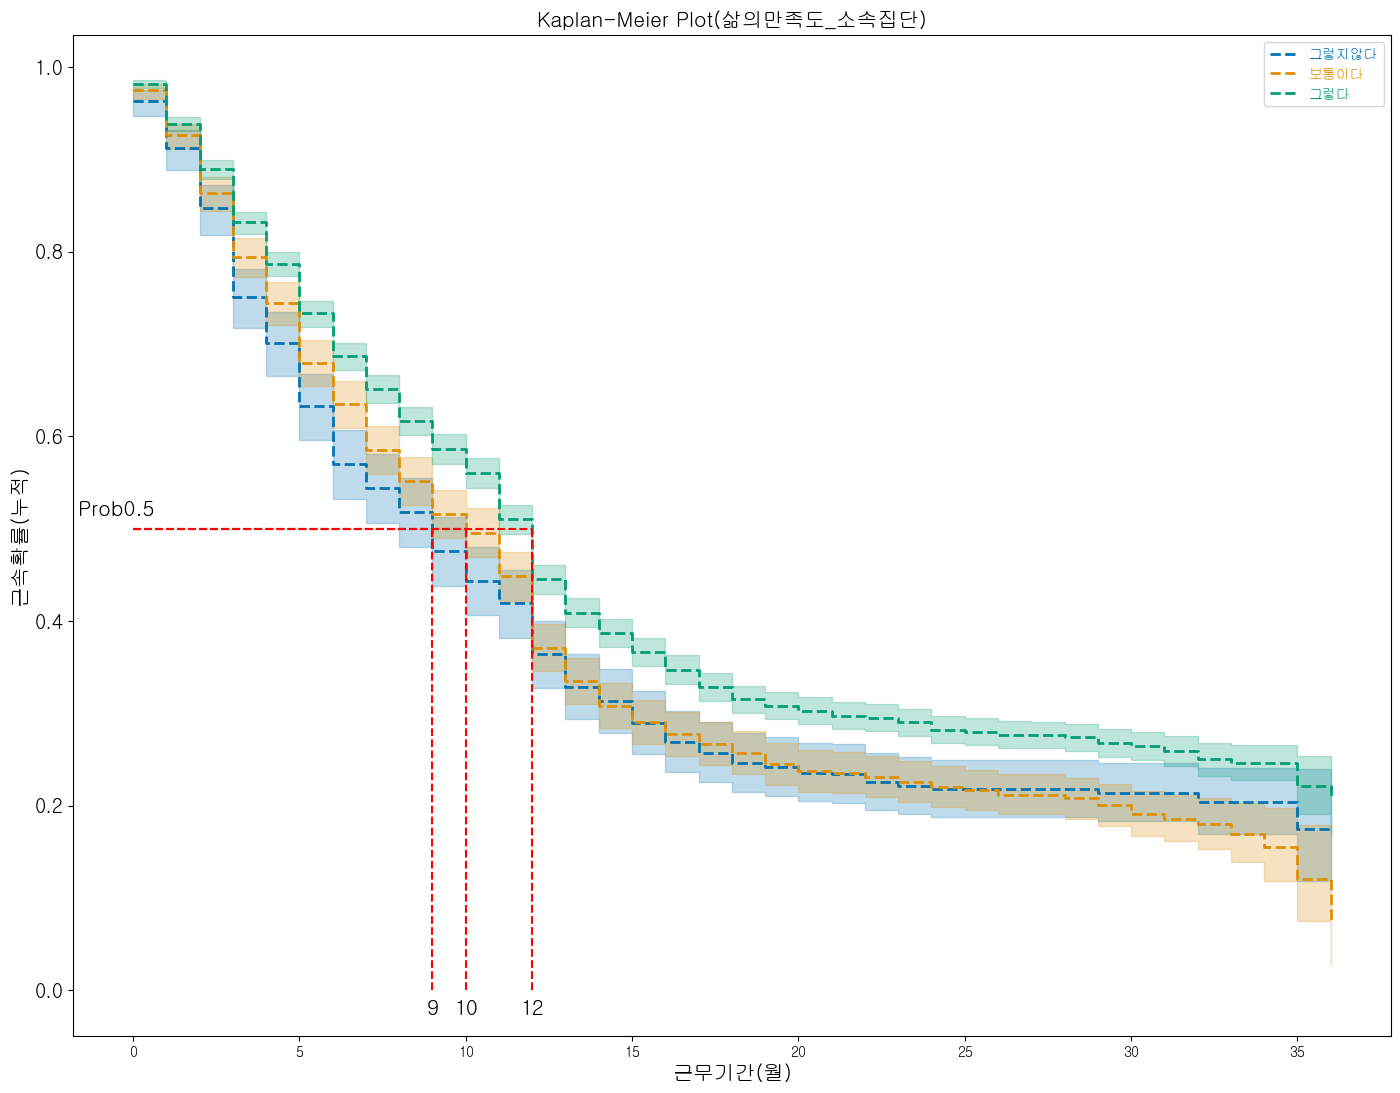

In [38]:
# define kmf3
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf3 = KaplanMeierFitter()

# divide data into two groups based on a condition (for example, 삶의만족도_소속집단)
group1 = df_1.loc[df_1['삶의만족도_소속집단'] == '그렇지않다']
group2 = df_1.loc[df_1['삶의만족도_소속집단'] == '보통이다']
group3 = df_1.loc[df_1['삶의만족도_소속집단'] == '그렇다']

#set seaborn palette
palette = sns.set_palette("colorblind")

plt.figure(figsize=(17,13))

# fit and plot KM curves for each group
kmf1.fit(group1['FirstWorkPeriod'], event_observed=group1['Resign'], label='그렇지않다')
q1 = kmf1.median_survival_time_
kmf1.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q1, q1], [0, 0.5], linestyle='--', color='r')
plt.plot([0, q1], [0.5, 0.5], linestyle='--', color='r')

kmf2.fit(group2['FirstWorkPeriod'], event_observed=group2['Resign'], label='보통이다')
q2 = kmf2.median_survival_time_
kmf2.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q2, q2], [0, 0.5], linestyle='--', color='r')
plt.plot([0, q2], [0.5, 0.5], linestyle='--', color='r')

kmf3.fit(group3['FirstWorkPeriod'], event_observed=group3['Resign'], label='그렇다')
q3 = kmf3.median_survival_time_
kmf3.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q3, q3], [0, 0.5], linestyle='--', color='r')
plt.plot([0, q3], [0.5, 0.5], linestyle='--', color='r')

plt.title('Kaplan-Meier Plot(삶의만족도_소속집단)', fontsize=15)
plt.xlabel('근무기간(월)', fontsize= 15)
plt.ylabel('근속확률(누적)', fontsize=15)
plt.yticks(fontsize=14)

plt.text(q1, -0.02, f"{q1:.0f}", ha='center', va='center', fontsize=15)
plt.text(q2, -0.02, f"{q2:.0f}", ha='center', va='center', fontsize=15)
plt.text(q3, -0.02, f"{q3:.0f}", ha='center', va='center', fontsize=15)
plt.text(-0.5, 0.52, f"Prob{0.5}", ha='center', va='center', fontsize=15)

# set the legend using the palette
plt.legend(title='Group', fontsize=15, title_fontsize=15)
for i, text in enumerate(plt.legend().get_texts()):
    text.set_color(sns.color_palette()[i])

# # calculate log rank test statistics and add plot
# results_1 = logrank_test(group1['FirstWorkPeriod'], group2['FirstWorkPeriod'], group2['Resign'], group1['Resign'])
# plt.text(10,0.7,f"그렇지않다 vs 이공계_Log-Rank Test: p-value={results_1.p_value:.4f}", fontsize=15)

# results_2 = logrank_test(group1['FirstWorkPeriod'], group1['Resign'], group3['FirstWorkPeriod'], group3['Resign'])
# plt.text(10,0.5,f"문과 vs 예체능_Log-Rank Test: p-value={results_2.p_value:.4f}", fontsize=15)

# results_3 = logrank_test( group2['FirstWorkPeriod'], group2['Resign'], group3['FirstWorkPeriod'], group3['Resign'])
# plt.text(10,0.6,f"보통이다 vs 예체능_Log-Rank Test: p-value={results_3.p_value:.4f}", fontsize=15)

plt.show()

##### 재학중일자리경험 비교

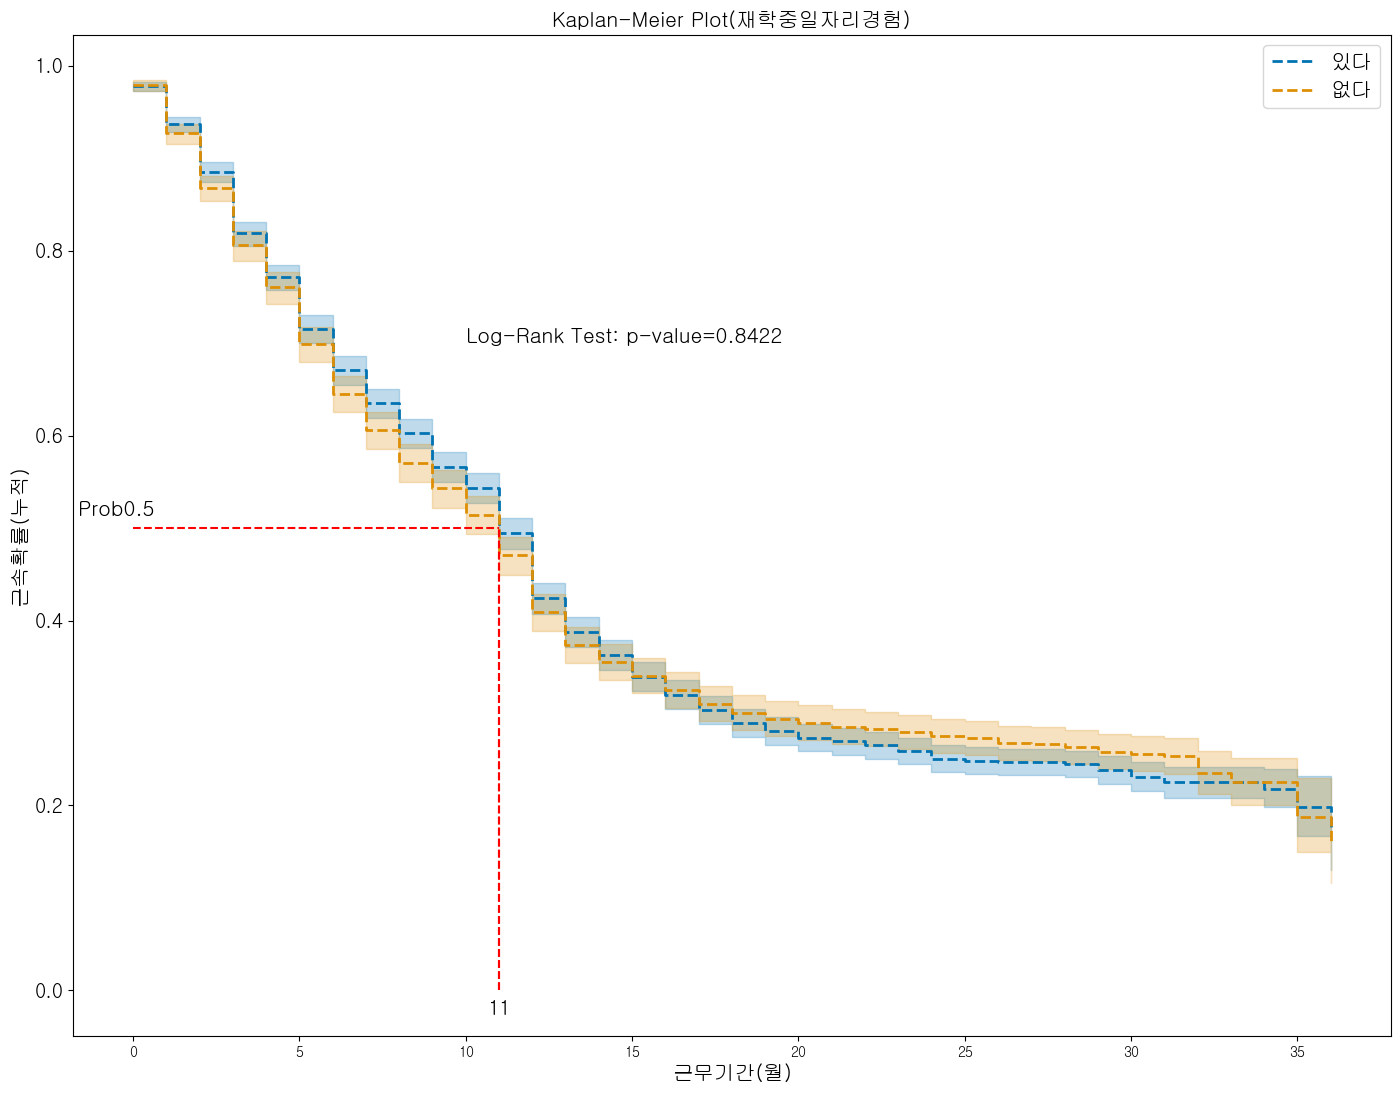

In [8]:
# divide data into two groups based on a condition (for example, 재학중일자리경험)
group1 = df_1.loc[df_1['재학중일자리경험'] == '있다']
group2 = df_1.loc[df_1['재학중일자리경험'] == '없다']

plt.figure(figsize=(17,13))

# fit and plot KM curves for each group
kmf1.fit(group1['FirstWorkPeriod'], event_observed=group1['Resign'], label='있다')
q1 = kmf1.median_survival_time_
kmf1.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q1, q1], [0, 0.5], linestyle='--', color='r')
plt.plot([0, q1], [0.5, 0.5], linestyle='--', color='r')

kmf2.fit(group2['FirstWorkPeriod'], event_observed=group2['Resign'], label='없다')
q2 = kmf2.median_survival_time_
kmf2.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q2, q2], [0, 0.5], linestyle='--', color='r')
#plt.plot([0, q2], [0.5, 0.5], linestyle='--', color='r')

plt.text(q1, -0.02, f"{q1:.0f}", ha='center', va='center', fontsize=15)
plt.text(-0.5, 0.52, f"Prob{0.5}", ha='center', va='center', fontsize=15)

plt.title('Kaplan-Meier Plot(재학중일자리경험)', fontsize=15)
plt.xlabel('근무기간(월)', fontsize= 15)
plt.ylabel('근속확률(누적)', fontsize=15)
plt.yticks(fontsize=14)
plt.legend(fontsize=15)

# calculate log rank test statistics and add plot
results = logrank_test(group1['FirstWorkPeriod'], group2['FirstWorkPeriod'], group1['Resign'], group2['Resign'])
plt.text(10,0.7,f"Log-Rank Test: p-value={results.p_value:.4f}", fontsize=15)

plt.show()

##### 종사자수 비교

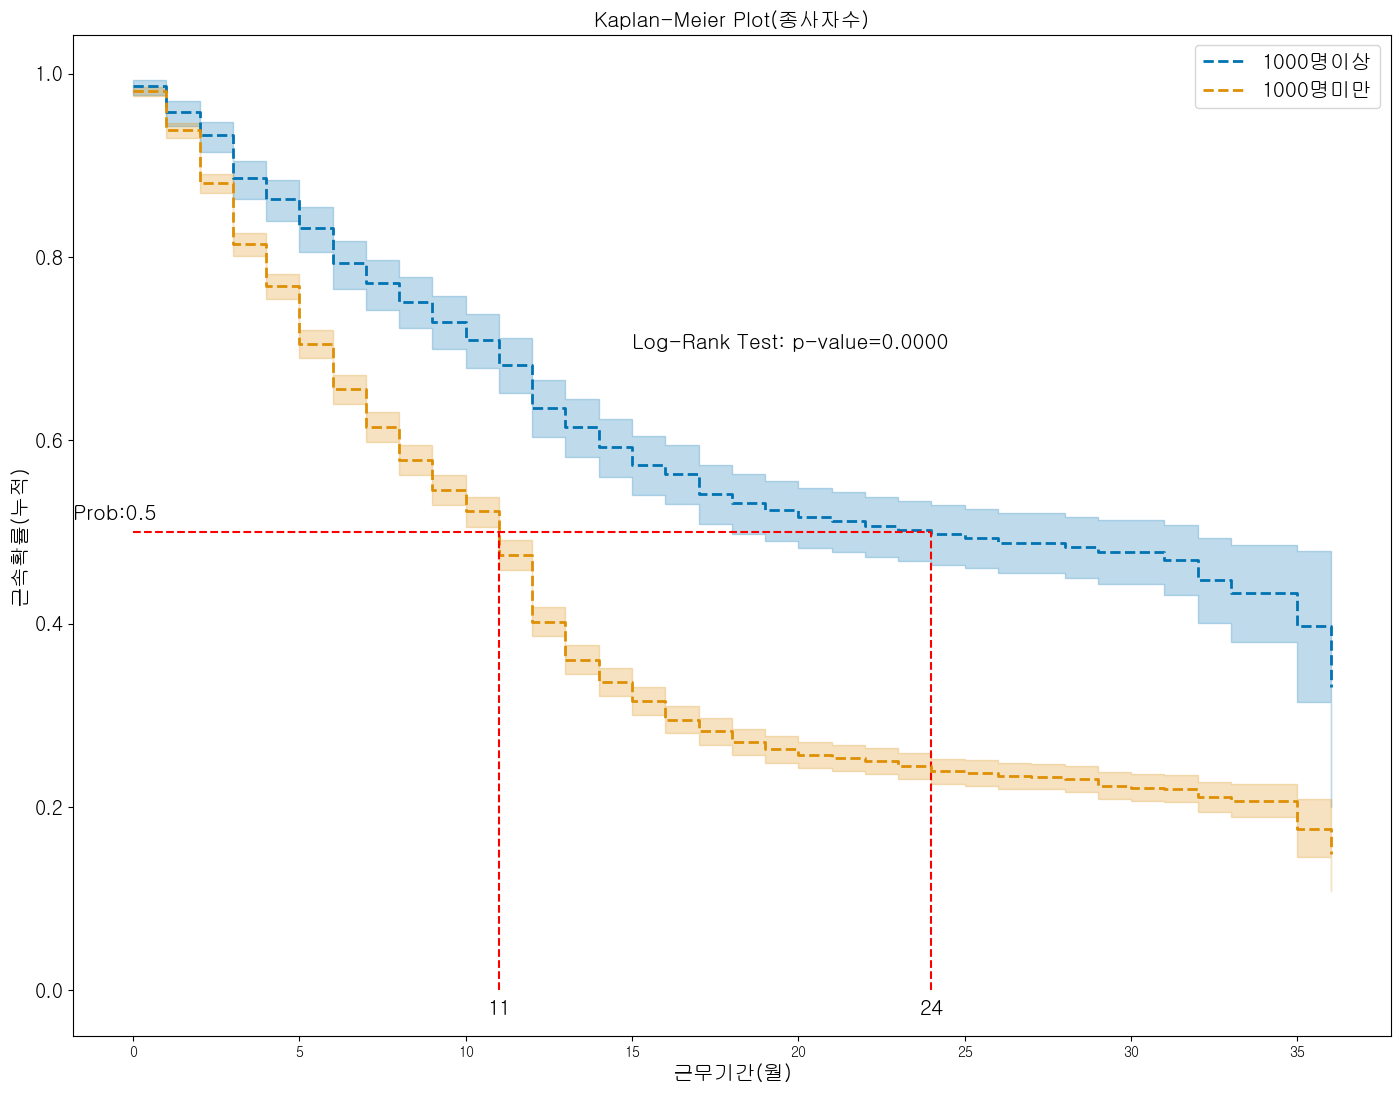

In [15]:
# divide data into two groups based on a condition (for example, 종사자수)
group1 = df_1.loc[df_1['종사자수'] == '1000명이상']
group2 = df_1.loc[df_1['종사자수'] == '1000명미만']

plt.figure(figsize=(17,13))

# fit and plot KM curves for each group
kmf1.fit(group1['FirstWorkPeriod'], event_observed=group1['Resign'], label='1000명이상')
q1 = kmf1.median_survival_time_
kmf1.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q1, q1], [0, 0.5], linestyle='--', color='r')
plt.plot([0, q1], [0.5, 0.5], linestyle='--', color='r')

kmf2.fit(group2['FirstWorkPeriod'], event_observed=group2['Resign'], label='1000명미만')
q2 = kmf2.median_survival_time_
kmf2.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q2, q2], [0, 0.5], linestyle='--', color='r')
#plt.plot([0, q2], [0.5, 0.5], linestyle='--', color='r')

plt.text(q1, -0.02, f"{q1:.0f}", ha='center', va='center', fontsize=15)
plt.text(q2, -0.02, f"{q2:.0f}", ha='center', va='center', fontsize=15)
plt.text(0.7, 0.52, f'Prob:{0.5}', ha='right', va='center', fontsize=15)

plt.title('Kaplan-Meier Plot(종사자수)', fontsize=15)
plt.xlabel('근무기간(월)', fontsize= 15)
plt.ylabel('근속확률(누적)', fontsize=15)
plt.yticks(fontsize=14)
plt.legend(fontsize=15)

# calculate log rank test statistics and add plot
results = logrank_test(group1['FirstWorkPeriod'], group2['FirstWorkPeriod'], group1['Resign'], group2['Resign'])
plt.text(15,0.7,f"Log-Rank Test: p-value={results.p_value:.4f}", fontsize=15)

plt.show()

##### 성별 비교

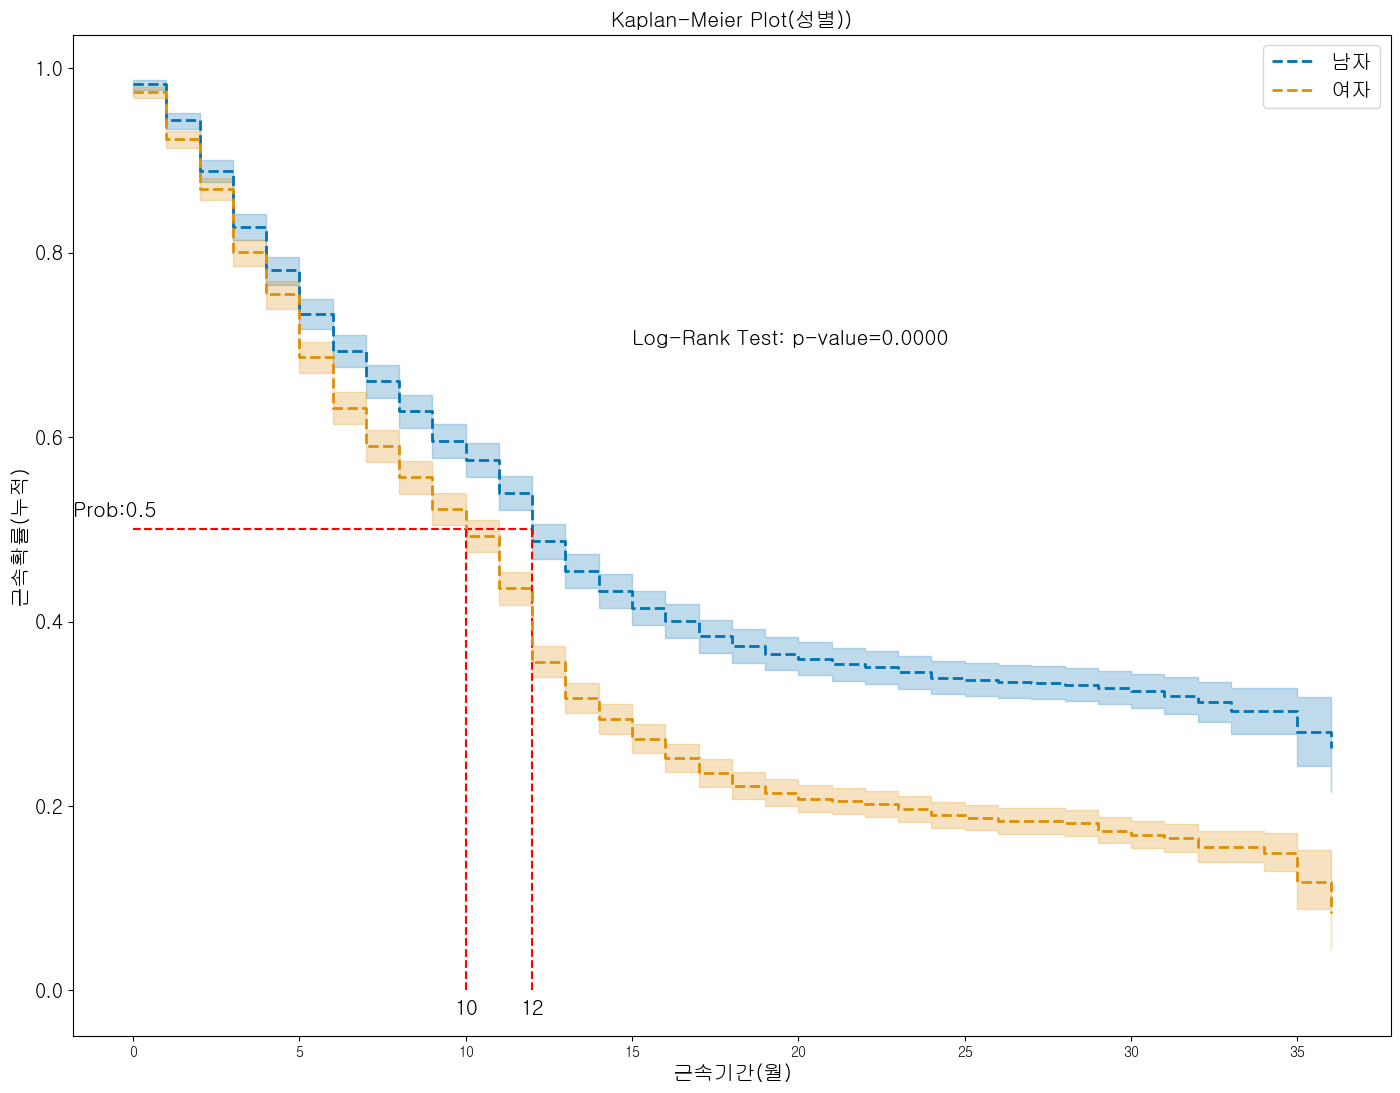

In [17]:
# divide data into two groups based on a condition (for example, 성별)
group1 = df_1.loc[df_1['성별'] == '남자']
group2 = df_1.loc[df_1['성별'] == '여자']

plt.figure(figsize=(17,13))

# fit and plot KM curves for each group
kmf1.fit(group1['FirstWorkPeriod'], event_observed=group1['Resign'], label='남자')
q1 = kmf1.median_survival_time_
kmf1.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q1, q1], [0, 0.5], linestyle='--', color='r')
plt.plot([0, q1], [0.5, 0.5], linestyle='--', color='r')

kmf2.fit(group2['FirstWorkPeriod'], event_observed=group2['Resign'], label='여자')
q2 = kmf2.median_survival_time_
kmf2.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q2, q2], [0, 0.5], linestyle='--', color='r')
#plt.plot([0, q2], [0.5, 0.5], linestyle='--', color='r')

plt.text(q1, -0.02, f"{q1:.0f}", ha='center', va='center', fontsize=15)
plt.text(q2, -0.02, f"{q2:.0f}", ha='center', va='center', fontsize=15)
plt.text(0.7, 0.52, f'Prob:{0.5}', ha='right', va='center', fontsize=15)

plt.title('Kaplan-Meier Plot(성별))', fontsize=15)
plt.xlabel('근속기간(월)', fontsize= 15)
plt.ylabel('근속확률(누적)', fontsize=15)
plt.yticks(fontsize=14)
plt.legend(fontsize=15)

# calculate log rank test statistics and add plot
results = logrank_test(group1['FirstWorkPeriod'], group2['FirstWorkPeriod'], group1['Resign'], group2['Resign'])
plt.text(15,0.7,f"Log-Rank Test: p-value={results.p_value:.4f}", fontsize=15)

plt.show()

##### Overall vs 종사자수

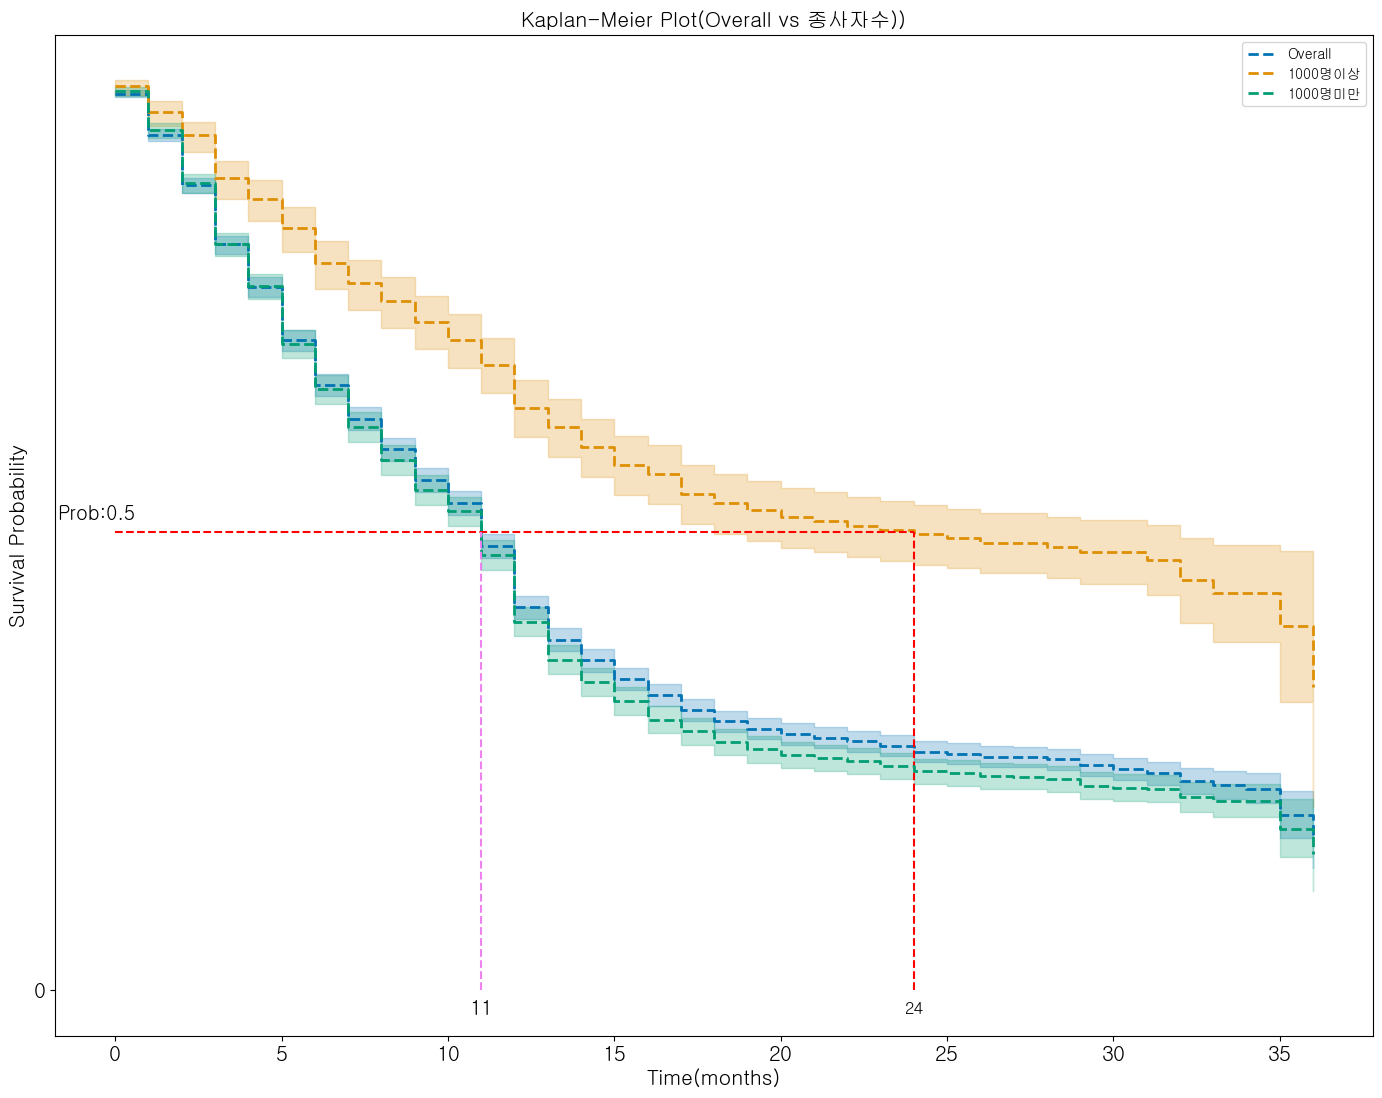

In [33]:
# Create a single plot
fig, ax = plt.subplots(figsize=(17, 13))

# Fit and plot overall KM curve
kmf = KaplanMeierFitter()
kmf.fit(df_1['FirstWorkPeriod'], event_observed=df_1['Resign'], label='Overall')
q = kmf.median_survival_time_
kmf.plot(ax=ax, ci_show=True, linestyle='--', linewidth=2)
#plt.plot([q, q], [0, 0.5], linestyle='--', color='b')
# plt.plot([0, q], [0.5, 0.5], linestyle='--', color='b')
# plt.text(q, -0.02, f"{q:.0f}", ha='center', va='center', fontsize=12)

# Fit and plot KM curve for group with 1000 or more employees
group1 = df_1.loc[df_1['종사자수'] == '1000명이상']
kmf1 = KaplanMeierFitter()
kmf1.fit(group1['FirstWorkPeriod'], event_observed=group1['Resign'], label='1000명이상')
q1 = kmf1.median_survival_time_
kmf1.plot(ax=ax, ci_show=True, linestyle='--', linewidth=2)
ax.plot([q1, q1], [0, 0.5], linestyle='--', color='r')
ax.text(q1, -0.02, f"{q1:.0f}", ha='center', va='center', fontsize=12)
plt.plot([0, q1], [0.5, 0.5], linestyle='--', color='r')
ax.text(0.6, 0.52, f'Prob:{0.5}', ha='right', va='center', fontsize=14)

# Fit and plot KM curve for group with less than 1000 employees
group2 = df_1.loc[df_1['종사자수'] == '1000명미만']
kmf2 = KaplanMeierFitter()
kmf2.fit(group2['FirstWorkPeriod'], event_observed=group2['Resign'], label='1000명미만')
q2 = kmf2.median_survival_time_
kmf2.plot(ax=ax, ci_show=True, linestyle='--', linewidth=2)
ax.plot([q2, q2], [0, 0.5], linestyle='--', color='violet')
ax.text(q2, -0.02, f"{q2:.0f}", ha='center', va='center', fontsize=15)

# Set axis labels and tick sizes
plt.title('Kaplan-Meier Plot(Overall vs 종사자수))', fontsize=15)
ax.set_xlabel('Time(months)', fontsize=15)
ax.set_ylabel('Survival Probability', fontsize=15)
ax.set_yticks(range(0, 1))
ax.tick_params(axis='both', labelsize=15)

# Add legend and log rank test statistics to the plot
# ax.legend(fontsize=15)
# results = logrank_test(group1['FirstWorkPeriod'], group2['FirstWorkPeriod'], group1['Resign'], group2['Resign'])
# ax.text(15,0.7,f"Log-Rank Test: p-value = {results.p_value:.4f}", fontsize=15)

plt.show()